## Analytics Task

brief exploratory analysis on the transformed data 

In [55]:
### Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Question asked - 

1)Top 5 countries with the highest average ImpactScore

2)Most affected country in terms of Job Loss Due to AI (%)

3)Trend: How has ImpactScore changed over years (basic plot) overall, and also for each industry

**importing the dataset. Based on question ask we only needed cleaned dataset no needed of summary dataset so lets import that and start analysis**

importing dataset and store in dataframe

In [7]:
df_clean = pd.read_csv(r"C:/Users/user/Desktop/Ai_impact_project/Global_AI_Content_Impact_Dataset_cleaned.csv")

In [8]:
df_clean.head()

,Country,Year,ConsumerIndustry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%),ImpactScore
0,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76,81
1,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93,85
2,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41,79
3,USA,2021,Retail,66.95,47.72,0.86,27.58,64.42,ChatGPT,Lenient,68.14,8.09,67
4,Australia,2023,Media,68.23,6.14,6.20,53.13,53.16,Claude,Moderate,71.60,15.26,68


In [38]:
df_summary = pd.read_csv(r"C:\Users\user\Desktop\Ai_impact_project\Global_AI_Content_Impact_Dataset_summary.csv",index_col=False)

In [39]:
df_summary = df_summary.iloc[:10,1:3]

In [40]:
df_summary

,Country,ImpactScore
0,Australia,74.666667
1,Canada,66.500000
2,China,78.888889
3,France,71.933333
4,Germany,81.000000
5,India,66.692308
6,Japan,76.727273
7,South Korea,71.000000
8,UK,77.066667
9,USA,74.200000


In [41]:
top_country = df_summary.sort_values(by='ImpactScore',ascending=False).head(5)

In [42]:
print(f'Top 5 countries with highest impact score are -')
top_country

Top 5 countries with highest impact score are -


,Country,ImpactScore
4,Germany,81.000000
2,China,78.888889
8,UK,77.066667
6,Japan,76.727273
0,Australia,74.666667


**now to find 
Most affected country in terms of Job Loss Due to AI (%)**

In [44]:
most_affected = df_clean.loc[df_clean['Job Loss Due to AI (%)'].idxmax()]

In [47]:
print(f"Most affected country in terms of Job Loss Due to AI (%) is {most_affected['Country']} with {most_affected['Job Loss Due to AI (%)']}")

Most affected country in terms of Job Loss Due to AI (%) is Japan with 49.65


**lets find How has ImpactScore changed over years (basic plot) overall, and also for each industry**

In [49]:
df_clean.rename(columns={'AI Adoption Rate (%)':'impact_score'},inplace=True)

In [54]:
###over_years the impact is 
df_years = df_clean.groupby('Year')['impact_score'].mean().reset_index()


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


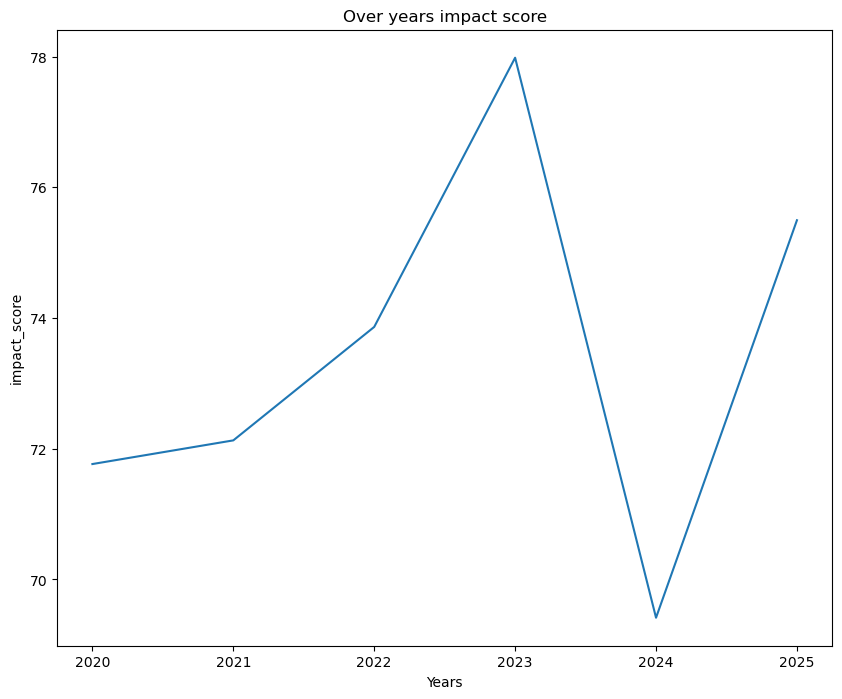

In [58]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year',y='impact_score',data=df_years)
plt.title('Over years impact score')
plt.xlabel('Years')
plt.ylabel('Average ImpactScore')
plt.show()

Interpretation - 
2020–2023: A steady increase in impact score, peaking in 2023 at around 78.
2024: A sharp drop to the lowest point (~69.5), possibly due to a specific event or poor industry performance.
2025: A partial recovery, with the score rising again but not reaching the 2023 peak.

In [59]:
df_industry_year = df_clean.groupby(['Year','ConsumerIndustry'])['impact_score'].mean().reset_index()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

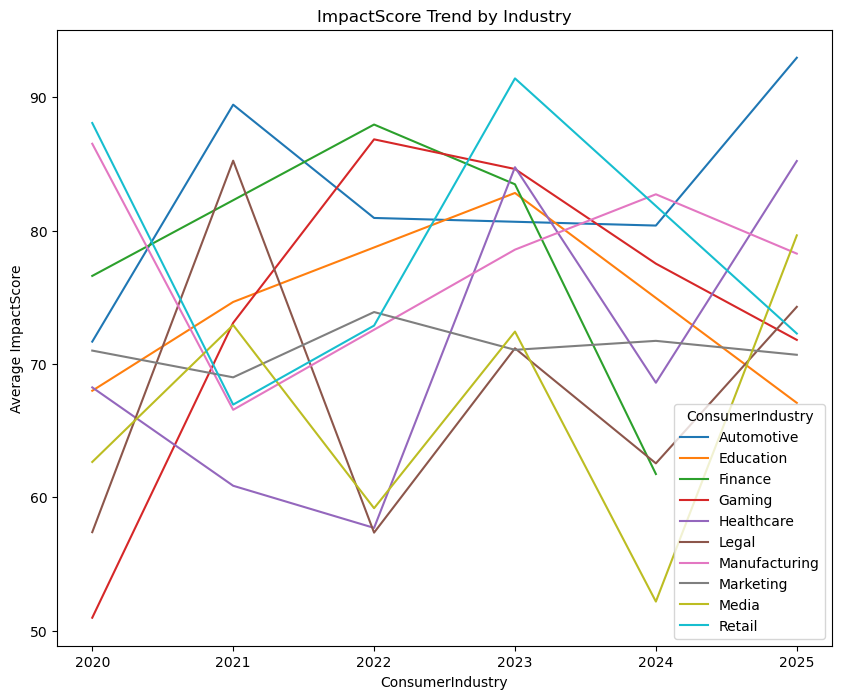

In [65]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year',y='impact_score',hue='ConsumerIndustry',data=df_industry_year)
plt.title('ImpactScore Trend by Industry')
plt.xlabel('ConsumerIndustry')
plt.ylabel('Average ImpactScore')
plt.show()

Interpretation - 
Retail and Automotive show relatively high scores, with noticeable ups and downs, especially a sharp increase for Retail by 2023 and 2025.

Finance peaks in 2022 and then drops in 2024 before partially recovering.

Healthcare and Gaming have strong rebounds around 2023.

Some industries like Marketing stay relatively flat, showing minimal change in ImpactScore across the years.



In [68]:
#KPI card showing

In [69]:
max_impact = df_clean["ImpactScore"].max()

In [71]:
print(f'Max impact score is - {max_impact}')

Max impact score is - 95


In [72]:
print(f'Total entries after clean data : {len(df_clean)}' ) (#since we directly import dataset from s3 where clean data set store after tranformation)

Total entries after clean data : 109


In [74]:
print(f"Total affected country after cleaning are - {df_clean['Country'].nunique()}")

Total affected country after cleaning are - 10
